# Pymaceuticals Inc.
---

### Analysis

The following analysis evaluates efficacy of Capomulin on squamous cell carcinoma (SCC) tumor growth in a population of 249 mice over 45 days. Capomulin was measured against other drug regimens and while all had a relatively equal population size, Capomulin was given a little more than average. The mice were evenly distributed amongst the sexes. A statistical summary of the results suggests that the test results are fairly uniform and appear reliable and show a general slight negative skew without major outliers. Capomulin performed most similarly to Ramicane. When one mouse was selected at random from the group, analysis indicates that with a treatment of Capomulin, tumor size did decrease over time. Analysis also shows a signifcant positive correlation between mouse weight and tumor size. Therefore, the weight of a mouse may effect the results of the study.

 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# Checking the number of mice.
mouse_count = mouse_df["Mouse ID"].nunique()
mouse_count

249

In [163]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#.duplicated() and .drop_duplicates() functions found on Stack Overflow
duplicate_mask = mouse_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicates_df = mouse_df[duplicate_mask]

In [164]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop_duplicates(["Mouse ID"])
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [166]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df.count()
clean_mouse_count

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_summary_stats = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev', 'Tumor Volume SEM']
mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Std Dev', 'sem': 'SEM'})
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

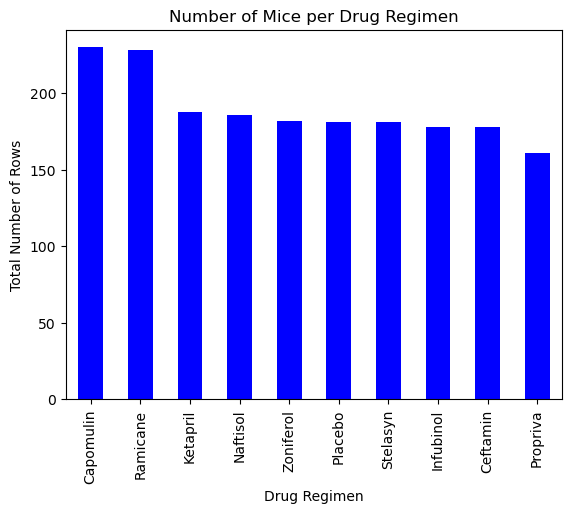

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = mouse_df["Drug Regimen"].value_counts()
drug_counts.plot(kind = 'bar', color = 'b')
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.show()

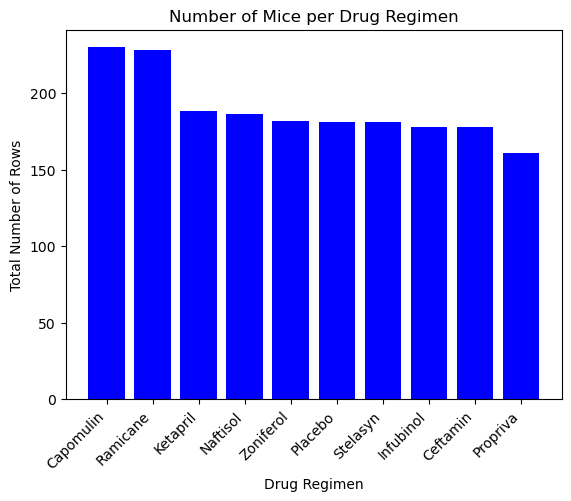

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts, color='b')
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Number of Rows")
plt.show()

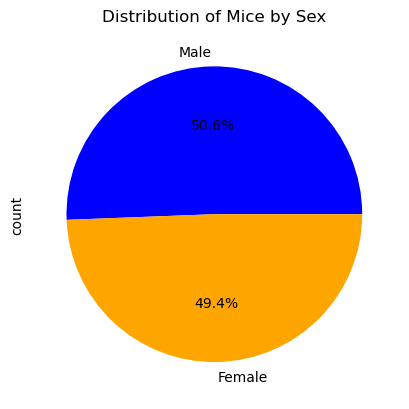

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = mouse_df["Sex"].value_counts()
sex_distribution.plot.pie(autopct = '%.1f%%', colors = ['b', 'orange'], startangle = 360)
plt.title("Distribution of Mice by Sex")
plt.show()

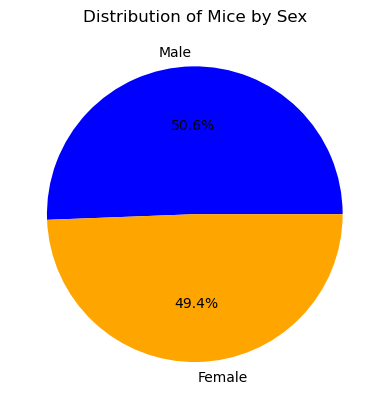

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=['Male', 'Female'], colors=['b', 'orange'], autopct="%1.1f%%", startangle=360)
plt.title("Distribution of Mice by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_mouse_df = mouse_df[mouse_df['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_mouse_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()
last_timepoints_df.columns = ['Mouse ID', 'Timepoint']
last_timepoints_df

# Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoints_df, filtered_mouse_df, on=['Mouse ID', 'Timepoint'], how='left')
tumor_volume_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [179]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in selected_regimens:
    
    # add subset 
    subset_data = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    tumor_volume_data.append(subset_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = subset_data.loc[(subset_data < lower_bound) | (subset_data > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


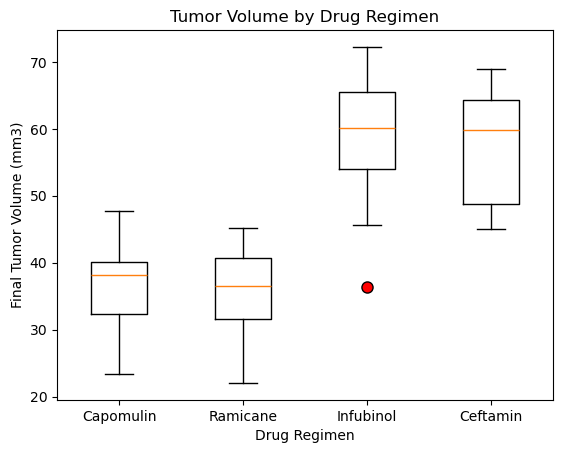

In [183]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=selected_regimens, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black'))

ax.set_title('Tumor Volume by Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

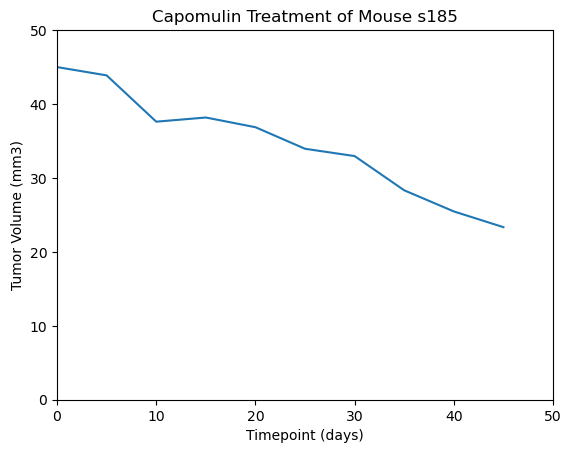

In [195]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# The method for establishing variables (mouse_s185_data, timepoint_s185,... was suggested by chatGPT)
mouse_s185_data = mouse_df[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Mouse ID'] == 's185')]
timepoint_s185 = mouse_s185_data['Timepoint']
tumor_vol_s185 = mouse_s185_data['Tumor Volume (mm3)']

plt.plot(timepoint_s185, tumor_vol_s185)
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(timepoint_s185) + 5)
plt.ylim(0, max(tumor_vol_s185) + 5)
plt.show()

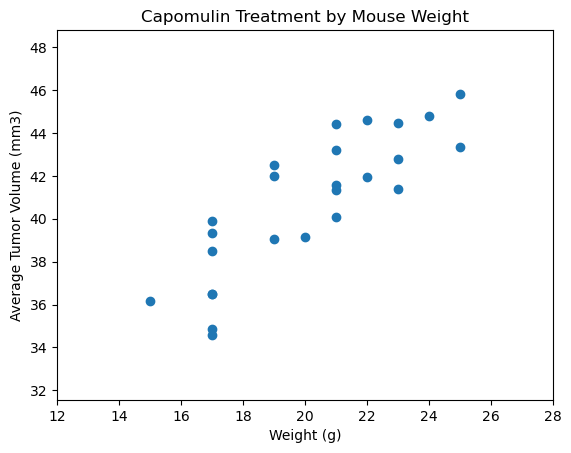

In [210]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_capomulin_data = mouse_df[(mouse_df['Drug Regimen'] == 'Capomulin')]
cap_weight = mouse_capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
cap_tumor_volume = mouse_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(cap_weight, cap_tumor_volume)
plt.title("Capomulin Treatment by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(cap_weight)-3, max(cap_weight) + 3)
plt.ylim(min(cap_tumor_volume)-3, max(cap_tumor_volume) + 3)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


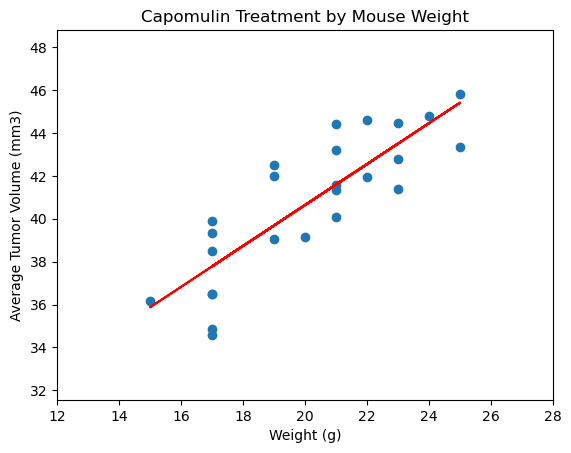

In [212]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_capomulin_data = mouse_df[(mouse_df['Drug Regimen'] == 'Capomulin')]
cap_weight = mouse_capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
cap_tumor_volume = mouse_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation = st.pearsonr(cap_weight, cap_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(cap_weight, cap_tumor_volume)
regress_values = cap_weight * slope + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(cap_weight, cap_tumor_volume)
plt.plot(cap_weight, regress_values, "r-")
plt.title("Capomulin Treatment by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(cap_weight)-3, max(cap_weight) + 3)
plt.ylim(min(cap_tumor_volume)-3, max(cap_tumor_volume) + 3)
plt.show()